#### Functions (IGNORE)

In [2]:
import yfinance as yf
missing_data_tickers = [] # use this as a list of tickers with missing data

def get_data_from_start_to_end(ticker, start_date, end_date):
    global missing_data_tickers  # Use the global list to accumulate missing tickers
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        if stock_data.empty:
            missing_data_tickers.append(ticker)
            raise ValueError(f"Stock data for ticker {ticker} during the period from {start_date} to {end_date} was not found.")
        return stock_data
    except Exception as e:
        print(f"An error occurred for ticker {ticker}: {e}")
        missing_data_tickers.append(ticker)
        return None


In [3]:
# for a variety of periods load in different list of tickers
def download_stock_data_for_periods(tickers, periods):
    all_data = {}
    
    for period, (start_date, end_date) in periods.items():
        period_data = {}
        for ticker in tickers:
            data = get_data_from_start_to_end(ticker, start_date, end_date)
            if data is not None:
                period_data[ticker] = data
        all_data[period] = period_data
    
    return all_data

In [4]:
import pandas as pd

# Get the adjusted close prices
adj_close_sector_etf = {}

# Create adjusted close price only listing of sector ETFs
def get_adjusted_closed_price(nested_dict, tickers, periods):
    for period in periods:
        stock_price_df = pd.DataFrame()  # Create a new DataFrame for each period
        for ticker in tickers:
            stock_price_df[ticker] = nested_dict[period][ticker]['Adj Close']
        
        adj_close_sector_etf[period] = stock_price_df  # Store the complete DataFrame for the period
    
    return adj_close_sector_etf

In [5]:
import random

def stochastic_modeling(nested_dict, tickers, periods,num_samples):
    # Store the returns in a nested dictionary
    nested_dict_returns = {period: {ticker: [] for ticker in tickers} for period in periods}

    # Go through each economic time period
    for period in periods:
        max_index = len(nested_dict[period]) - 150  # Ensure there's enough data to calculate ROI

        # Generate random samples from the valid range
        random_dates = random.choices(range(max_index), k=num_samples)

        for ticker in tickers:
            for date_idx in random_dates:
                start_price = nested_dict[period][ticker].iloc[date_idx]
                end_price = nested_dict[period][ticker].iloc[date_idx + 150]

                # Get the return by the Holding Period Return
                roi = (((end_price - start_price) / start_price) * 100)

                nested_dict_returns[period][ticker].append(roi)

    return nested_dict_returns  # Return the nested dictionary with returns

In [6]:
def stochastic_roi(tickers,periods,return_rates_list,analysis_type):
    df = pd.DataFrame(index=tickers,columns=periods)
    for period in periods:
        for ticker in tickers:
            data = pd.Series(return_rates_list[period][ticker])
            if analysis_type=='Mean':
                df.at[ticker,period] = data.mean()
            elif analysis_type=='Median':
                df.at[ticker,period] = data.median()
            elif analysis_type=='Std':
                df.at[ticker,period] = data.std()
            elif analysis_type=='Variance':
                df.at[ticker,period] = data.var()

    return df

# Technical Analysis Investment Strategy

In [7]:
# import packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# create time periods for where this takes place
economic_cycle_periods = {

    "trough": ("2008-10-01", "2009-06-01"),
    "expansion": ("2012-01-01", "2015-01-01"),
    "peak": ("2019-06-01", "2020-02-01"),
    "contraction": ("2007-12-01", "2008-10-01"),
}

economic_cycle_periods_list = ['trough','expansion','peak','contraction']

In [9]:
# create etf tickers for sectors
sector_etf_tickers = [
    'XLB', # materials sector
    'XLI', # industrials sector
    'XLF', # financials
    'XLK', # information technology
    'XLY', # consumer discretionary
    'XLP', # consumer staples
    'XLE', # energy
    'XLV', # healthcare
    'VOX', # communication services
    'XLU', # utilities
    'IYR' # real estate
    ]

## Buy and Hold Investment Technique
The buy and hold strategy is a passive investing strategy that will be applied to the 11 sector ETFs during different macroeconomic time periods.

In [10]:
# save nested dictionary data as a variable to be accessed.
sector_etf_data = download_stock_data_for_periods(sector_etf_tickers,economic_cycle_periods)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [11]:
# get adjusted close price
sector_etf_adjusted_close = get_adjusted_closed_price(sector_etf_data,sector_etf_tickers,economic_cycle_periods_list)

### Perform stochastic modeling using buy and hold strategy
Use a different day where the stock begins investing then hold for a month and see the return.

In [12]:
# perform stochastic modeling on the buy and 
stochastic_buy_hold = stochastic_modeling(sector_etf_adjusted_close,sector_etf_tickers,economic_cycle_periods_list,10000)

In [13]:
# this can be repeated for mean, median, std and var
stochastic_roi(sector_etf_tickers,economic_cycle_periods_list,stochastic_buy_hold,'Mean')

,trough,expansion,peak,contraction
XLB,-1.703231,9.861785,5.613113,-4.406224
XLI,-10.863463,12.395767,11.179268,-8.585632
XLF,-24.814533,13.618264,14.466757,-24.775833
XLK,1.801348,9.907727,26.421838,-9.135113
XLY,0.479496,12.982851,8.866706,-7.573251
XLP,-7.496289,9.766508,10.43249,0.834803
XLE,0.681584,8.4233,-0.817177,-2.235257
XLV,-5.184785,16.027275,14.261109,-6.981116
VOX,8.695989,9.591981,14.796366,-13.772639
XLU,-6.226512,7.697694,13.053354,-9.164094


## Bollinger Bands Investment Technique
Using John Bollinger's techniques 'Bollinger Bands' to create buy and sell signals to observe the roi for investing for a month.

In [14]:
# add bollinger data
import scipy.stats as stats
def add_bollinger_data(data,window,conf_int):
        z_score = stats.norm.ppf(1 - (1 - conf_int) / 2) # create a zscore from the mean

        data['middle_band'] = data['Adj Close'].rolling(window).mean()
        data['upper_band'] = data['middle_band'] + z_score * data['Adj Close'].rolling(window).std()
        data['lower_band'] = data['middle_band'] - z_score * data['Adj Close'].rolling(window).std()

        data['Signal'] = None

        data['Signal'] = np.where(data['Adj Close'] < data['lower_band'], 'Buy', 
                              np.where(data['Adj Close'] > data['upper_band'], 'Sell', np.nan))

        return data

In [15]:
# create bollinger data for multiple time period and multiple tickers
def bollinger_data_multiple_periods_tickers(periods,tickers,data,window,confidence_period):
    # for each ticker in economic time periods
    for period in periods:
            for ticker in tickers:
                    try:
                        add_bollinger_data(data[period][ticker],window,confidence_period)
                    except KeyError:
                        print(f'Data for {ticker} does not exist during {period}')

In [16]:
# create bollinger bands in stock data
bollinger_data_multiple_periods_tickers(economic_cycle_periods_list,sector_etf_tickers,sector_etf_data,20,0.95)
sector_etf_data['trough']['XLB']

,Open,High,Low,Close,Adj Close,Volume,middle_band,upper_band,lower_band,Signal
Date,,,,,,,,,,
2008-10-01,32.759998,33.189999,32.130001,32.849998,23.119261,14639500,NaN,NaN,NaN,nan
2008-10-02,31.540001,31.860001,29.930000,30.490000,21.458340,12581300,NaN,NaN,NaN,nan
2008-10-03,30.190001,31.690001,29.780001,30.190001,21.247204,16770600,NaN,NaN,NaN,nan
2008-10-06,29.510000,29.510000,26.889999,28.700001,20.198563,22512700,NaN,NaN,NaN,nan
2008-10-07,29.160000,29.530001,27.049999,27.219999,19.156965,16004900,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...
2009-05-22,26.530001,26.660000,26.110001,26.299999,18.848713,8421500,18.742288,19.907895,17.576682,nan
2009-05-26,26.170000,26.969999,25.830000,26.930000,19.300224,7886900,18.827573,19.888619,17.766528,nan
2009-05-27,26.790001,26.850000,25.860001,25.920000,18.576370,7216600,18.881324,19.759552,18.003096,nan


In [17]:
# example case of bollinger bands in stock data
sector_etf_data['expansion']['XLB']['Signal'].value_counts()

nan     670
Buy      45
Sell     39
Name: Signal, dtype: int64

In [18]:
def collect_signals(nested_dict, periods, tickers):
    # Initialize an empty dictionary to hold DataFrames for each period
    bb_nested_dict = {}

    for period in periods:
        # Create a DataFrame for each period with the tickers as columns
        signals_period = pd.DataFrame(columns=tickers)
        
        # Loop through each ticker and extract the 'Signal'
        for ticker in tickers:
            signals_period[ticker] = nested_dict[period][ticker]['Signal']
        
        # Store the DataFrame in the dictionary using the period as the key
        bb_nested_dict[period] = signals_period

    # Return the dictionary containing DataFrames for each period
    return bb_nested_dict

In [19]:
bb_bands_signals = collect_signals(sector_etf_data,economic_cycle_periods_list,sector_etf_tickers)
bb_bands_signals['trough']

,XLB,XLI,XLF,XLK,XLY,XLP,XLE,XLV,VOX,XLU,IYR
Date,,,,,,,,,,,
2008-10-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-07,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
2009-05-22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-05-26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-05-27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [45]:
import pandas as pd
import numpy as np
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def portfolio_investment(bb_signals_nd, adj_close_nd, periods_date, periods_list, tickers, n_sample, initial_investment, percent_to_buy, percent_to_sell):

    # Track actions day by day for the entire portfolio
    portfolio_tracker = {period: pd.DataFrame(columns=['Date', 'Account Balance', 'Portfolio Value', 'Total Value', 'Profit', 'Sector Allocation']) for period in periods_list}

    # Portfolio summary - nested dictionary for each period and ticker
    portfolio_summary = {period: {ticker: pd.DataFrame() for ticker in tickers} for period in periods_list}
    
    # Set data to be accessed
    adj_close_data = adj_close_nd
    bollinger_band_data = bb_signals_nd

    all_data = {
        'Stock Tracker': portfolio_summary,
        'Portfolio Tracker': portfolio_tracker,
        'Adjusted Close Price': adj_close_nd,
        'Bollinger Band Signal': bollinger_band_data
    }

    # Loop through each economic period
    for period in periods_list:

        # Create the date range for the current period
        date_range = pd.date_range(start=pd.to_datetime(periods_date[period][0]), end=pd.to_datetime(periods_date[period][1]) - timedelta(days=90))
        
        # Get random dates for stochastic modeling
        start_dates = np.random.choice(date_range, size=n_sample, replace=False)

        # Loop through sampled start dates
        for start_date in start_dates:
            time_stamp = pd.to_datetime(start_date)

            # Initialize balance for portfolio investment   
            account_balance = initial_investment
            portfolio_value = 0
            shares_number = {ticker: 0 for ticker in tickers}  # Initialize share count for each ticker
            shares_value = {ticker: 0 for ticker in tickers}   # Initialize share value for each ticker

            # Extract the adjusted close and signal data for time period
            adj_close_period = adj_close_data[period].loc[time_stamp:time_stamp + timedelta(days=90)]
            bb_signals_period = bollinger_band_data[period].loc[time_stamp:time_stamp + timedelta(days=90)]

            # Iterate over each row in the Bollinger Band signals (day by day)
            for row_idx, row in bb_signals_period.iterrows():
                daily_balance_change = 0
                daily_portfolio_value = 0
                
                for col_idx, signal in enumerate(row):
                    ticker = tickers[col_idx]  # Correctly get ticker for each column
                    adj_close_price = adj_close_period.loc[row_idx, ticker]  # Get corresponding adjusted close price

                    # initialize the tracking of stocks for current ticker
                    stock_tracker = all_data['Stock Tracker'][period][ticker]

                    # Handle Buy action
                    if signal == 'Buy':
                        amount_to_buy = percent_to_buy * account_balance
                        if account_balance >= amount_to_buy:
                            # Calculate shares to buy
                            shares_to_buy = amount_to_buy / adj_close_price
                            shares_number[ticker] += shares_to_buy
                            shares_value[ticker] = shares_number[ticker] * adj_close_price

                            # Track investment for the current period
                            stock_tracker = stock_tracker.append({
                                'Date': row_idx,
                                'Share Price': adj_close_price,
                                'Signal': 'Buy',
                                'Buy/Sell Amount ($)': amount_to_buy,
                                'Buy/Sell Number of Shares': shares_to_buy,
                                'Shares ($) Ownership': shares_value[ticker],
                                'Shares Ownership': shares_number[ticker]
                            }, ignore_index=True)

                            # Update account balance after buying
                            account_balance -= amount_to_buy

                    # Handle Sell action
                    elif signal == 'Sell':
                        amount_to_sell = percent_to_sell * shares_value[ticker]
                        if shares_value[ticker] >= amount_to_sell:
                            # Calculate shares to sell
                            shares_to_sell = amount_to_sell / adj_close_price
                            shares_number[ticker] -= shares_to_sell
                            shares_value[ticker] = shares_number[ticker] * adj_close_price

                            # Track the sell action
                            stock_tracker = stock_tracker.append({
                                'Date': row_idx,
                                'Share Price': adj_close_price,
                                'Signal': 'Sell',
                                'Buy/Sell Amount ($)': amount_to_sell,
                                'Buy/Sell Number of Shares': shares_to_sell,
                                'Shares ($) Ownership': shares_value[ticker],
                                'Shares Ownership': shares_number[ticker]
                            }, ignore_index=True)

                            # Update account balance after selling
                            account_balance += amount_to_sell

                    # Handle Hold action (no action taken)
                    else:
                        # Track the hold state
                        stock_tracker = stock_tracker.append({
                            'Date': row_idx,
                            'Share Price': adj_close_price,
                            'Signal': 'Hold',
                            'Buy/Sell Amount ($)': 0,
                            'Buy/Sell Number of Shares': 0,
                            'Shares ($) Ownership': shares_value[ticker],
                            'Shares Ownership': shares_number[ticker]
                        }, ignore_index=True)

                    # Save the updated tracker back to portfolio summary
                    all_data['Stock Tracker'][period][ticker] = stock_tracker.copy()

                # Calculate total portfolio value for all tickers for the day
                portfolio_value = sum(shares_number[ticker] * adj_close_period.loc[row_idx, ticker] for ticker in tickers)

                # Total value (account balance + portfolio value)
                total_value = account_balance + portfolio_value

                # Calculate profit (difference from initial investment)
                profit = total_value - initial_investment

                # Calculate percentage allocation of each ticker to total portfolio value
                if portfolio_value > 0:
                    sector_allocation = {ticker: (shares_number[ticker] * adj_close_period.loc[row_idx, ticker]) / portfolio_value * 100 for ticker in tickers}
                else:
                    sector_allocation = {ticker: 0 for ticker in tickers}

                # Track portfolio changes for the current day
                portfolio_tracker[period] = portfolio_tracker[period].append({
                    'Date': row_idx,
                    'Account Balance': account_balance,
                    'Portfolio Value': portfolio_value,
                    'Total Value': total_value,
                    'Profit': profit,
                    'Sector Allocation': sector_allocation
                }, ignore_index=True)

            # Update the portfolio tracker for the period
            all_data['Portfolio Tracker'][period] = portfolio_tracker[period]

    # Return the complete portfolio summary for all periods and tickers
    return all_data

# Example usage
stock_tracking = portfolio_investment(bb_bands_signals, adj_close_sector_etf, economic_cycle_periods, economic_cycle_periods_list, sector_etf_tickers, 1, 1000, 0.025, 0.025)

In [60]:
stock_tracking['Portfolio Tracker']['trough']['Sector Allocation'][11]

{'XLB': 0.0,
 'XLI': 0.0,
 'XLF': 50.63291139240506,
 'XLK': 0.0,
 'XLY': 0.0,
 'XLP': 0.0,
 'XLE': 0.0,
 'XLV': 0.0,
 'VOX': 0.0,
 'XLU': 0.0,
 'IYR': 49.36708860759494}

In [42]:
stock_tracking['Stock Tracker']['trough']['XLK']

,Date,Share Price,Signal,Buy/Sell Amount ($),Buy/Sell Number of Shares,Shares ($) Ownership,Shares Ownership
0,2008-11-10,12.467236,Hold,0.000000,0.000000,0.000000,0.000000
1,2008-11-11,12.196725,Hold,0.000000,0.000000,0.000000,0.000000
2,2008-11-12,11.623888,Hold,0.000000,0.000000,0.000000,0.000000
3,2008-11-13,12.347897,Hold,0.000000,0.000000,0.000000,0.000000
4,2008-11-14,11.783010,Hold,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
56,2009-02-02,11.926042,Hold,0.000000,0.000000,23.644513,1.812415
57,2009-02-03,12.166005,Hold,0.000000,0.000000,23.644513,1.812415
58,2009-02-04,12.158001,Hold,0.000000,0.000000,23.644513,1.812415
59,2009-02-05,12.349966,Hold,0.000000,0.000000,23.644513,1.812415


In [36]:
stock_tracking['Stock Tracker']['trough']['XLV'].head(50)

,Date,Share Price,Signal,Buy/Sell Amount ($),Buy/Sell Number of Shares,Shares ($) Ownership,Shares Ownership
0,2008-11-10,19.888178,Hold,0.000000,0.000000,0.000000,0.000000
1,2008-11-11,19.531948,Hold,0.000000,0.000000,0.000000,0.000000
2,2008-11-12,19.099930,Hold,0.000000,0.000000,0.000000,0.000000
3,2008-11-13,20.123127,Hold,0.000000,0.000000,0.000000,0.000000
4,2008-11-14,19.357626,Hold,0.000000,0.000000,0.000000,0.000000
5,2008-11-17,19.024120,Hold,0.000000,0.000000,0.000000,0.000000
6,2008-11-18,19.152979,Hold,0.000000,0.000000,0.000000,0.000000
7,2008-11-19,18.379887,Buy,22.592197,1.229180,22.592197,1.229180
8,2008-11-20,17.856911,Buy,17.988710,1.007381,39.938075,2.236561
9,2008-11-21,17.879654,Buy,16.256179,0.909200,56.245121,3.145761


In [22]:
stock_tracking['Adjusted Close Price']['expansion'].head(50)

,XLB,XLI,XLF,XLK,XLY,XLP,XLE,XLV,VOX,XLU,IYR
Date,,,,,,,,,,,
2012-01-03,26.488375,27.099361,8.536141,21.622316,33.701874,23.113379,45.198639,28.458918,48.500950,22.923897,37.358250
2012-01-04,26.711508,27.225067,8.510546,21.680948,33.967369,23.063532,45.294067,28.321236,47.982113,22.794159,36.939980
2012-01-05,26.788424,27.232920,8.625728,21.747976,34.250004,23.049292,45.077766,28.402231,47.571663,22.839573,37.207939
2012-01-06,26.749966,27.177927,8.574534,21.756346,34.301403,22.899759,44.810593,28.450808,47.501965,22.716320,37.142570
2012-01-09,26.803816,27.382214,8.619326,21.722836,34.250004,22.935366,45.026878,28.499418,47.579411,22.748755,37.037994
2012-01-10,27.303888,27.775063,8.772899,21.798229,34.472694,23.013685,45.427658,28.709988,47.912403,22.781185,37.449749
2012-01-11,27.573154,27.861492,8.875283,21.865261,34.524086,22.913998,44.816956,28.734274,48.268650,22.677395,37.783089
2012-01-12,27.957825,28.105076,8.907278,21.974165,34.626854,22.906881,44.397099,28.823362,48.694569,22.644966,37.534725
2012-01-13,27.773180,27.885086,8.843291,21.848497,34.584034,22.885521,44.174438,28.693785,48.400276,22.631987,37.704639


In [23]:
stock_tracking['Portfolio Tracker']['trough']

,Date,Account Balance,Portfolio Value,Total Value,Profit,Percentage Invested
0,2008-12-24,1000,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
1,2008-12-26,1000,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
2,2008-12-29,1000,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
3,2008-12-30,1000,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
4,2008-12-31,1000.0,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
...,...,...,...,...,...,...
56,2009-03-18,237.985523,780.480929,1018.466451,18.466451,"{'XLB': 2.5356473187845094, 'XLI': 9.488958198..."
57,2009-03-19,239.477929,755.828514,995.306444,-4.693556,"{'XLB': 2.642754026335025, 'XLI': 9.7020214502..."
58,2009-03-20,239.477929,729.855307,969.333237,-30.666763,"{'XLB': 2.6886211333071737, 'XLI': 9.740886210..."
59,2009-03-23,244.661466,794.694345,1039.355810,39.355810,"{'XLB': 2.5534639230946543, 'XLI': 9.594325301..."


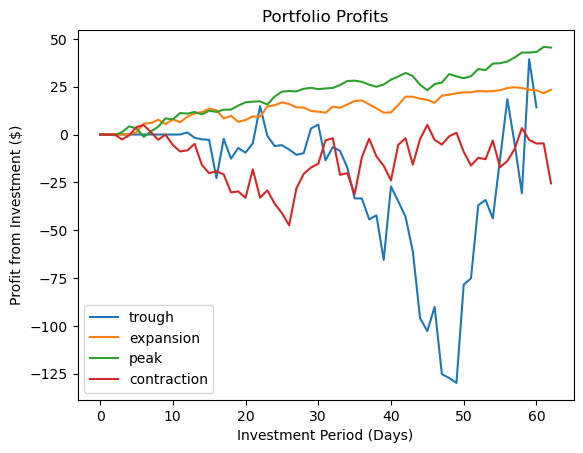

In [24]:
# compare the different profits 
for period in economic_cycle_periods_list:
    plt.plot(stock_tracking['Portfolio Tracker'][period]['Profit'],label=f'{period}')
plt.title('Portfolio Profits')
plt.xlabel('Investment Period (Days)')
plt.ylabel('Profit from Investment ($)')
plt.legend()
plt.show()

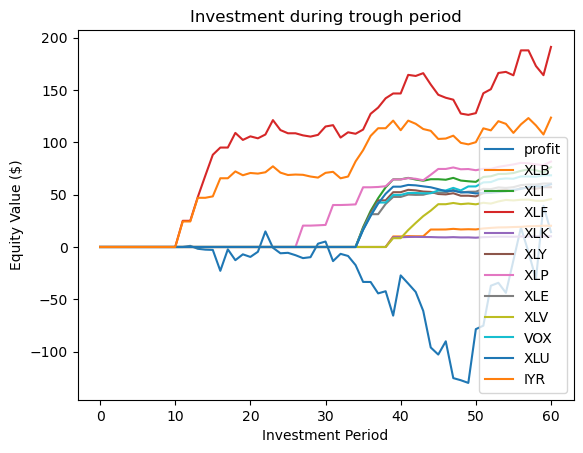

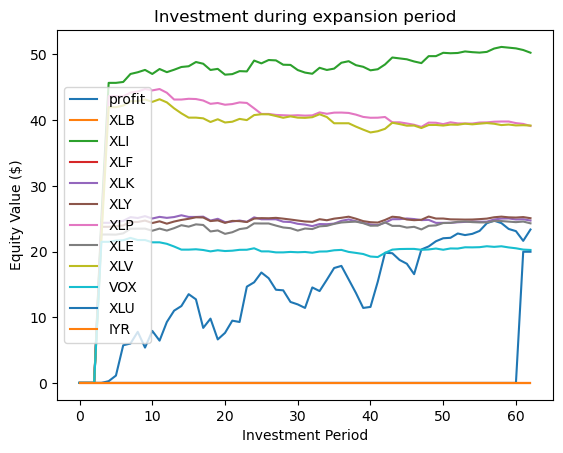

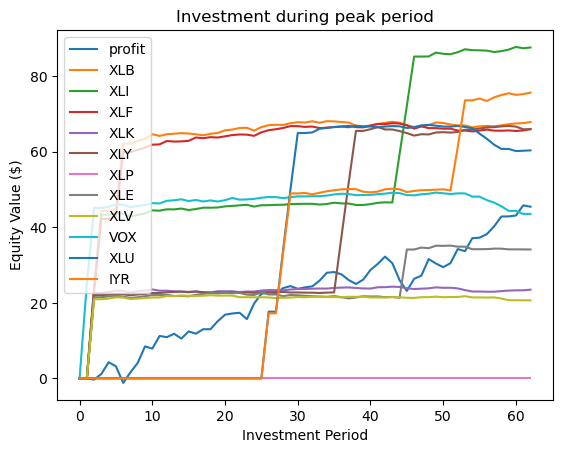

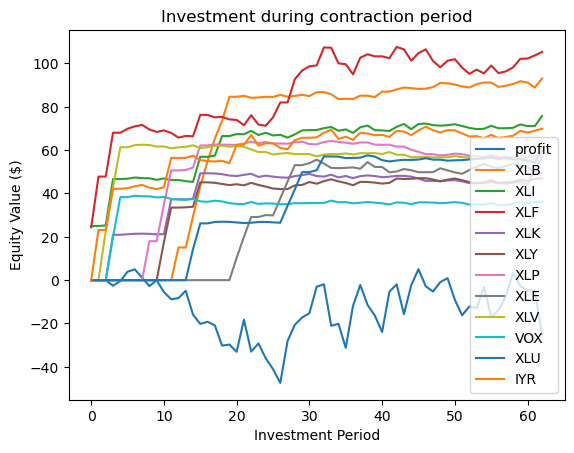

In [25]:
# compare the different sector make up

for period in economic_cycle_periods_list:
    plt.plot(stock_tracking['Portfolio Tracker'][period]['Profit'],label='profit')
    for ticker in sector_etf_tickers:
        plt.plot(stock_tracking['Stock Tracker'][period][ticker]['Shares ($) Ownership'],label=f'{ticker}')
    plt.title(f'Investment during {period} period')
    plt.xlabel('Investment Period')
    plt.ylabel('Equity Value ($)')
    plt.legend()
    plt.show()

In [26]:
# create a function that is only going to look at the final day of the stocks performance

In [31]:
import pandas as pd
import numpy as np
from datetime import timedelta

def calculate_stock_roi(bb_signals_nd, adj_close_nd, periods_date, periods_list, tickers, n_sample, initial_investment, percent_to_buy, percent_to_sell):
    # Initialize a nested dictionary to store ROI percentages for each period and ticker
    roi_results = {period: {ticker: [] for ticker in tickers} for period in periods_list}

    # Loop through each economic period
    for period in periods_list:
        # Create the date range for the current period
        date_range = pd.date_range(start=pd.to_datetime(periods_date[period][0]), end=pd.to_datetime(periods_date[period][1]) - timedelta(days=110))
        
        # Get random dates for stochastic modeling
        start_dates = np.random.choice(date_range, size=n_sample, replace=True)

        # Loop through sampled start dates
        for start_date in start_dates:
            time_stamp = pd.to_datetime(start_date)

            # Initialize variables
            account_balance = initial_investment
            shares_number = {ticker: 0 for ticker in tickers}  # Initialize share count for each ticker
            shares_value = {ticker: 0 for ticker in tickers}   # Initialize share value for each ticker

            # Extract the adjusted close and signal data for time period
            adj_close_period = adj_close_nd[period].loc[time_stamp:time_stamp + timedelta(days=110)]
            bb_signals_period = bb_signals_nd[period].loc[time_stamp:time_stamp + timedelta(days=110)]

            # Iterate over each row in the Bollinger Band signals (day by day)
            for row_idx, row in bb_signals_period.iterrows():
                for col_idx, signal in enumerate(row):
                    ticker = tickers[col_idx]  # Correctly get ticker for each column
                    adj_close_price = adj_close_period.loc[row_idx, ticker]  # Get corresponding adjusted close price

                    # Handle Buy action
                    if signal == 'Buy':
                        amount_to_buy = percent_to_buy * account_balance
                        if account_balance >= amount_to_buy:
                            shares_to_buy = amount_to_buy / adj_close_price
                            shares_number[ticker] += shares_to_buy
                            account_balance -= amount_to_buy

                    # Handle Sell action
                    elif signal == 'Sell':
                        if shares_number[ticker] > 0:
                            shares_value[ticker] = shares_number[ticker] * adj_close_price
                            amount_to_sell = percent_to_sell * shares_value[ticker]
                            if shares_value[ticker] >= amount_to_sell:
                                shares_to_sell = amount_to_sell / adj_close_price
                                shares_number[ticker] -= shares_to_sell
                                account_balance += amount_to_sell

            # Calculate total portfolio value at the end of the period
            portfolio_value = sum(shares_number[ticker] * adj_close_period.iloc[-1][ticker] for ticker in tickers)
            total_value = account_balance + portfolio_value
            
            # Calculate the profit relative to the initial investment
            profit = total_value - initial_investment
            
            # Calculate ROI for each stock as a percentage of the initial investment
            for ticker in tickers:
                if shares_number[ticker] > 0:  # Only consider tickers with shares owned
                    roi_dollar_value = shares_value[ticker] - (initial_investment * (percent_to_buy * shares_number[ticker]))

                else:
                    roi_dollar_value = 0

                # Store ROI in the results dictionary
                roi_results[period][ticker].append(roi_dollar_value)

    return roi_results

# Example usage
roi_tracking = calculate_stock_roi(bb_bands_signals, adj_close_sector_etf, economic_cycle_periods, economic_cycle_periods_list, sector_etf_tickers, 1000, 1000, 0.01, 0.01)

# This will give you the ROI results structured as [period][ticker]

In [28]:
roi_tracking['trough']

{'XLB': [9.898040695786548,
  -6.729086790048633,
  -6.729086790048633,
  6.046732030468737,
  -9.826234643171018,
  6.046732030468737,
  -6.729086790048633,
  6.046732030468737,
  -6.729086790048633,
  9.779550645795974,
  6.046732030468737,
  9.779550645795974,
  -6.729086790048633,
  6.5529848797641375,
  6.849585409684424,
  -6.729086790048633,
  9.978115137022723,
  9.779550645795974,
  6.91877314109538,
  9.681755139338012,
  8.868538934228097,
  -6.729086790048633,
  6.422580480656828,
  9.978115137022723,
  -9.826234643171018,
  6.046732030468737,
  -6.8657145087732205,
  -9.826234643171018,
  6.046732030468737,
  7.059252261091091,
  -6.729086790048633,
  -6.729086790048633,
  12.32280069468499,
  -6.729086790048633,
  -6.8657145087732205,
  -6.729086790048633,
  -6.729086790048633,
  -6.729086790048633,
  -6.8657145087732205,
  -6.729086790048633,
  -6.729086790048633,
  -5.081251040907761,
  9.978115137022723,
  -9.826234643171018,
  8.868538934228097,
  -6.729086790048633,


In [33]:
stochastic_roi(sector_etf_tickers,economic_cycle_periods_list,roi_tracking,'Mean')

,trough,expansion,peak,contraction
XLB,-0.463413,2.899416,16.255202,13.863624
XLI,5.998227,10.141617,17.543129,-16.572962
XLF,-88.335564,-3.970593,13.305775,-31.526506
XLK,1.199531,8.296667,14.310197,1.532439
XLY,9.563759,11.456197,35.933042,8.775858
XLP,-13.385003,5.475425,-0.840626,6.832155
XLE,15.619513,13.652822,27.022895,9.294936
XLV,5.253422,9.814801,8.648179,14.76397
VOX,20.249957,16.680775,11.49699,11.535882
XLU,-7.708683,8.583972,7.64883,3.121517


In [34]:
stochastic_roi(sector_etf_tickers,economic_cycle_periods_list,roi_tracking,'Std')

,trough,expansion,peak,contraction
XLB,8.795942,23.223808,9.47655,15.167195
XLI,18.913872,23.281243,10.625433,5.068927
XLF,55.179892,18.303325,8.918583,19.460268
XLK,2.42353,19.093333,7.359143,10.046849
XLY,11.804412,17.361796,8.735135,10.600682
XLP,19.946566,19.069855,3.906112,12.005746
XLE,14.598845,18.633493,16.903198,17.160017
XLV,17.026784,12.5463,9.486518,15.342326
VOX,17.302081,20.086276,6.748089,14.527679
XLU,16.184024,16.624763,14.960971,15.609284


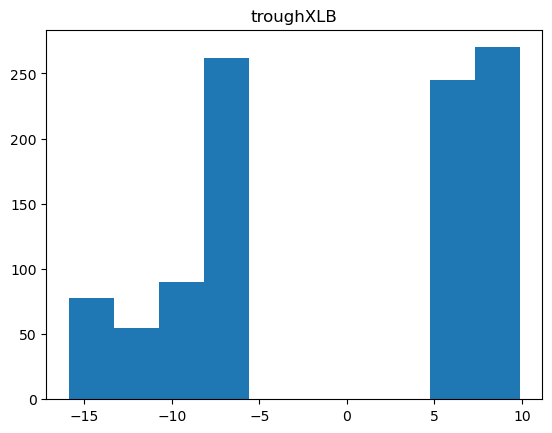

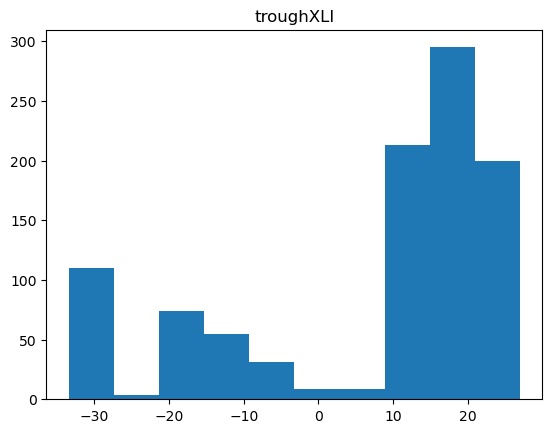

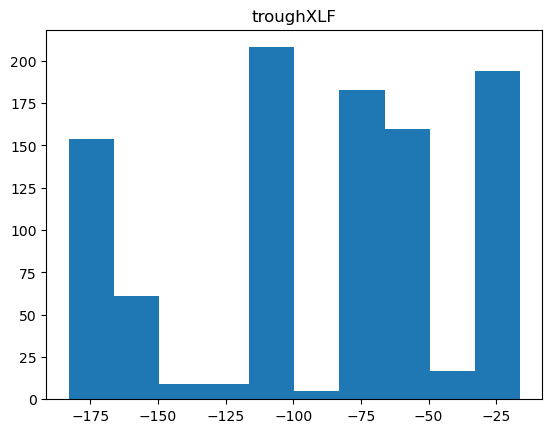

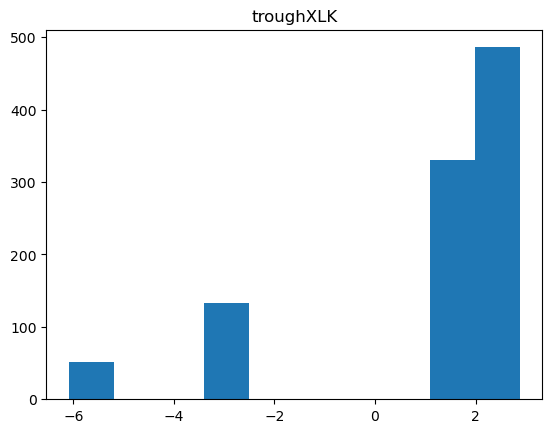

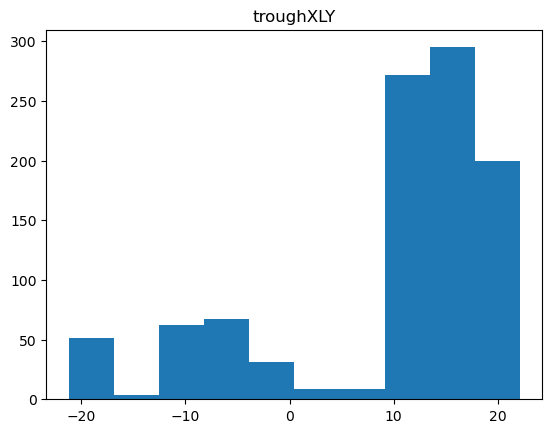

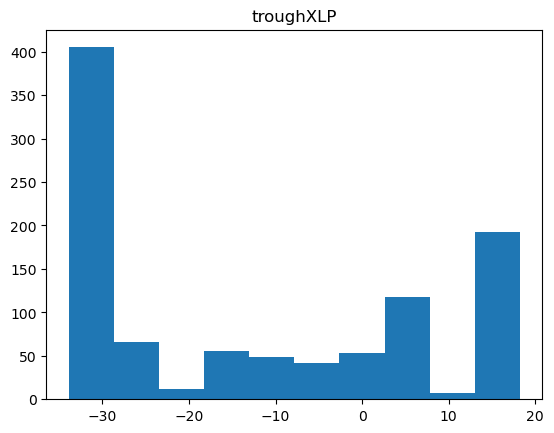

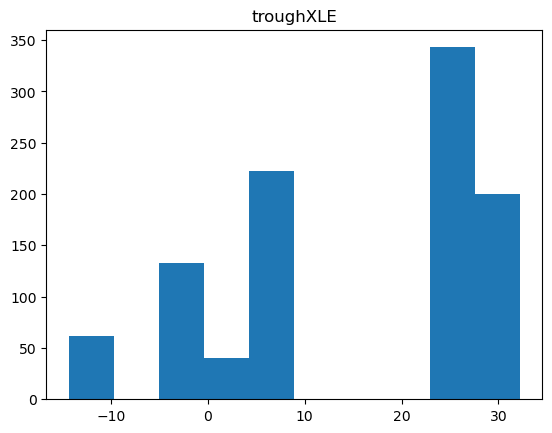

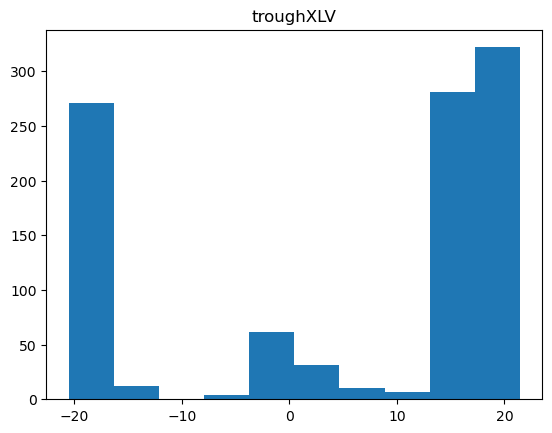

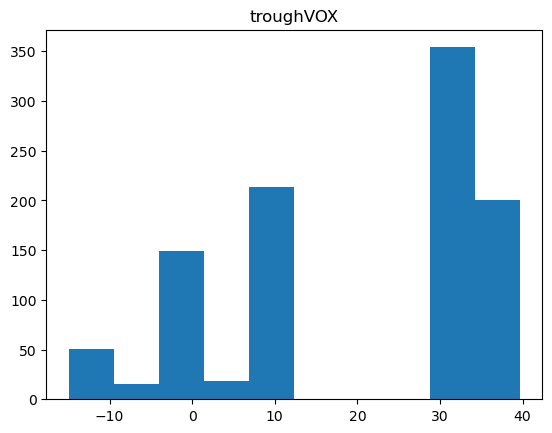

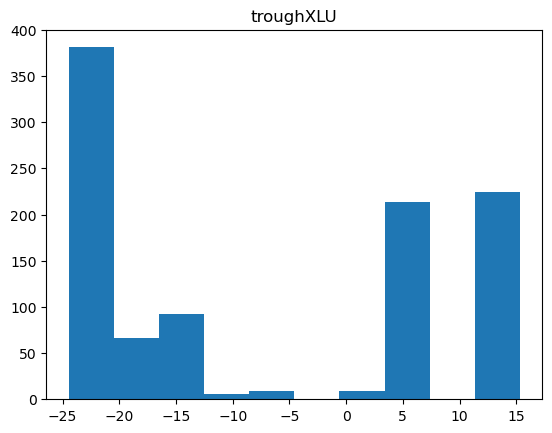

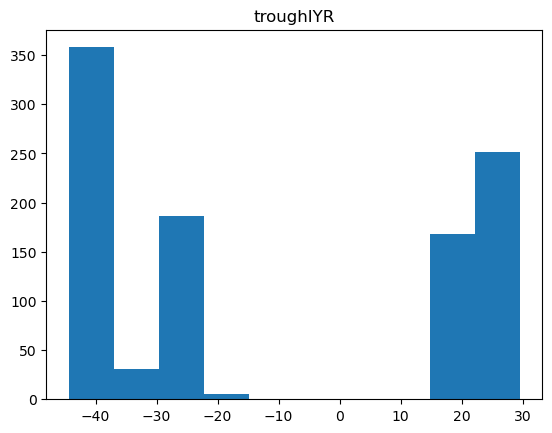

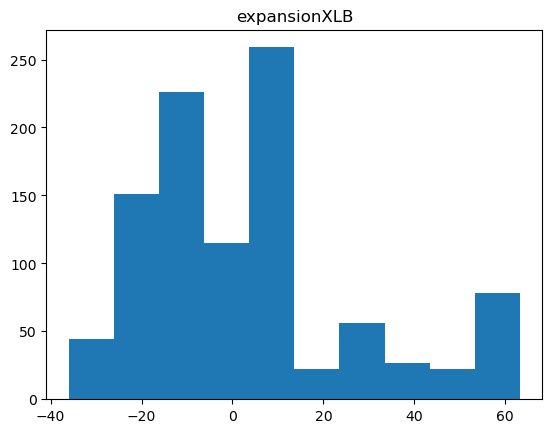

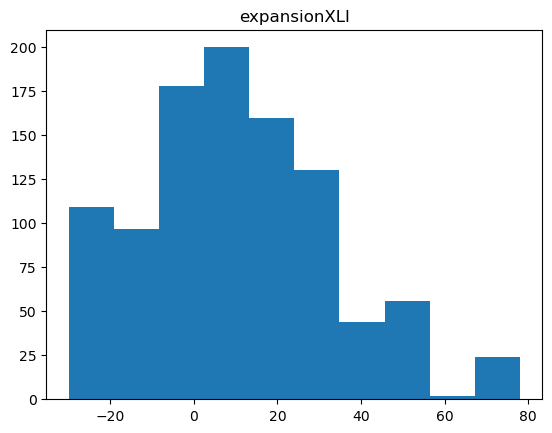

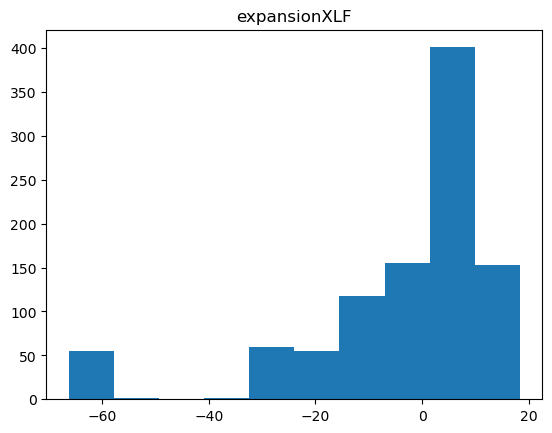

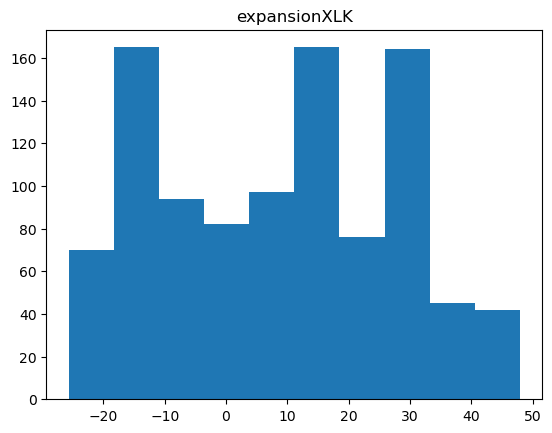

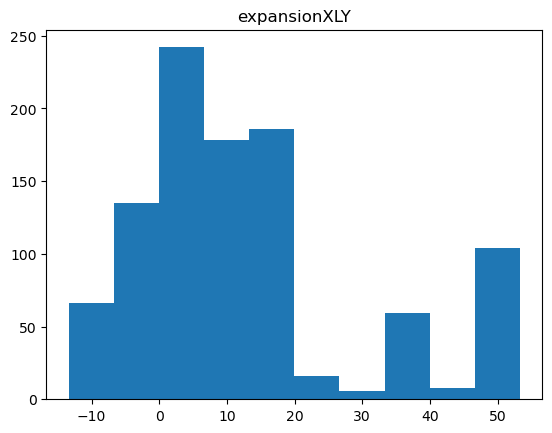

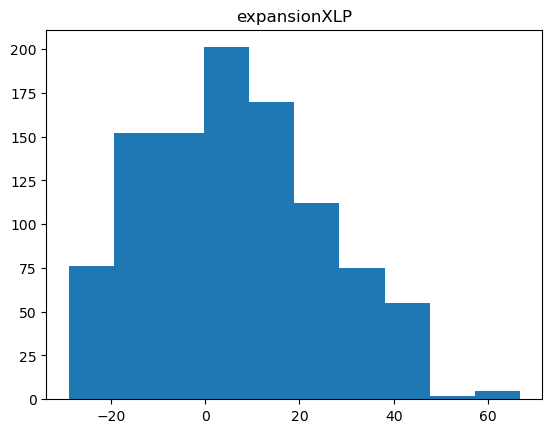

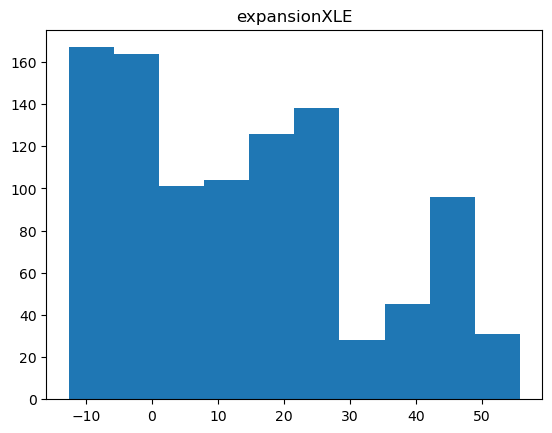

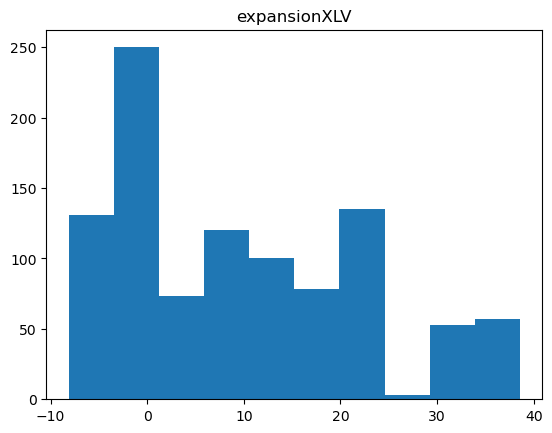

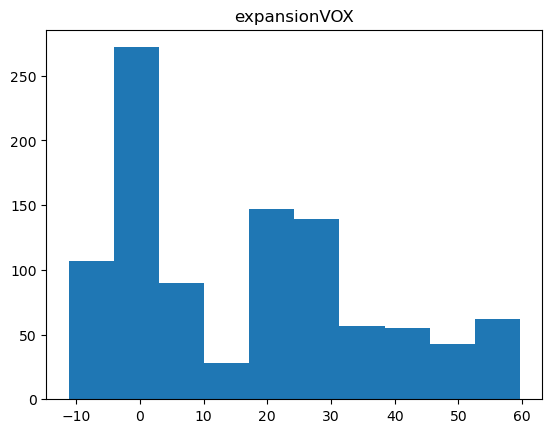

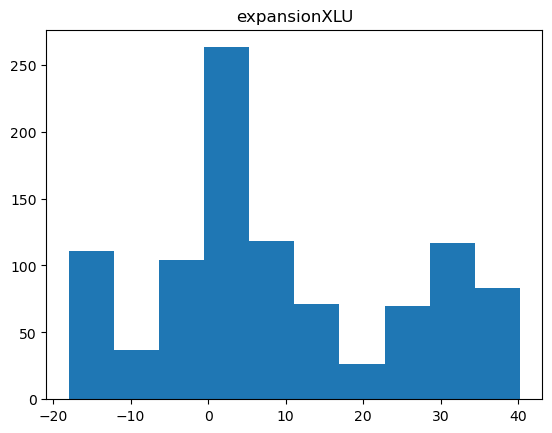

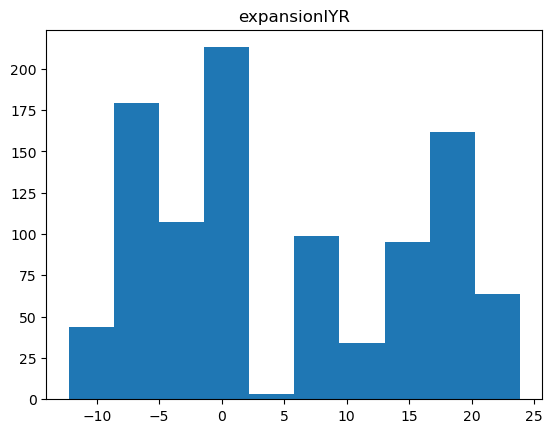

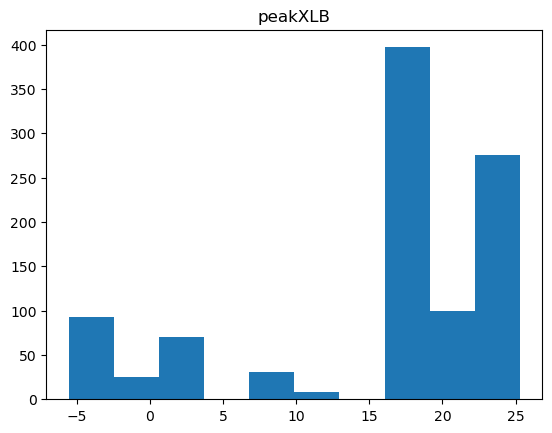

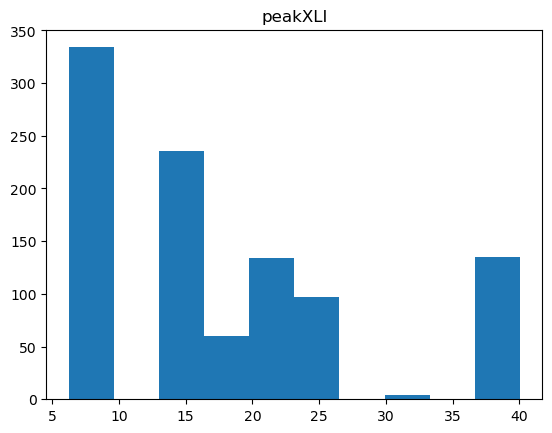

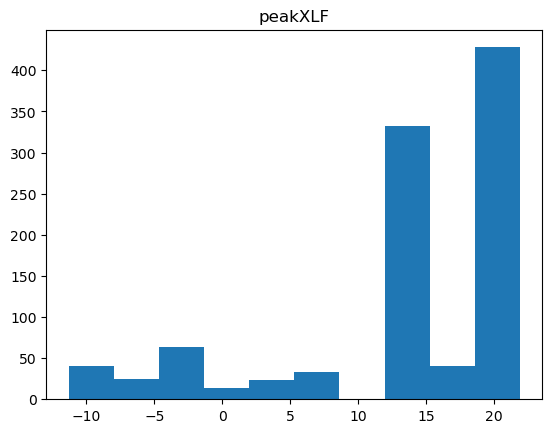

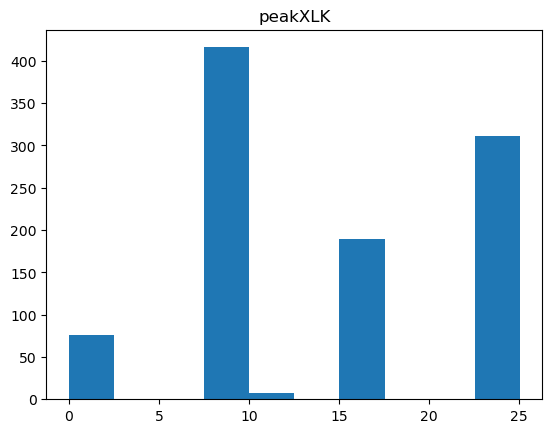

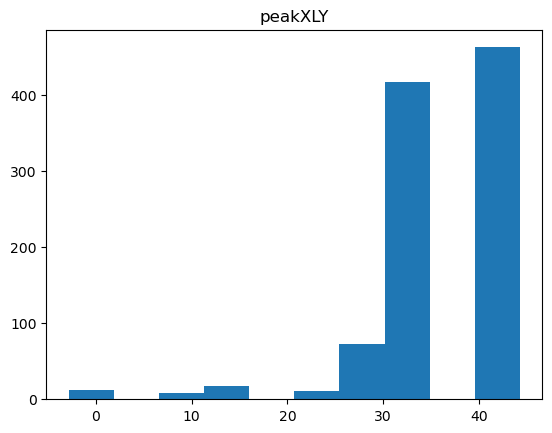

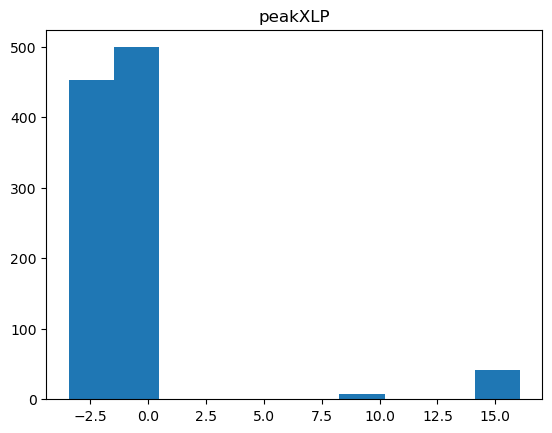

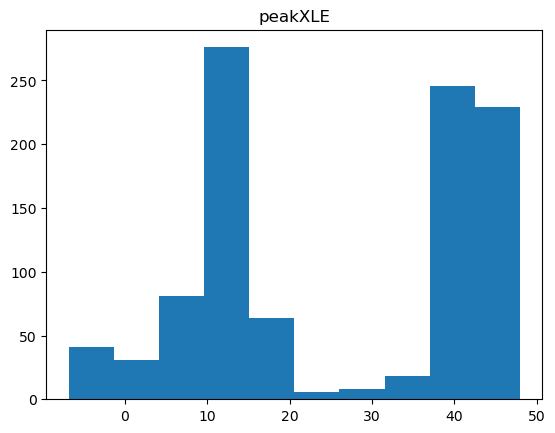

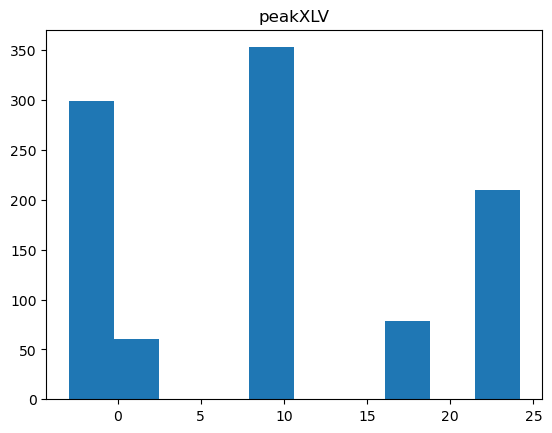

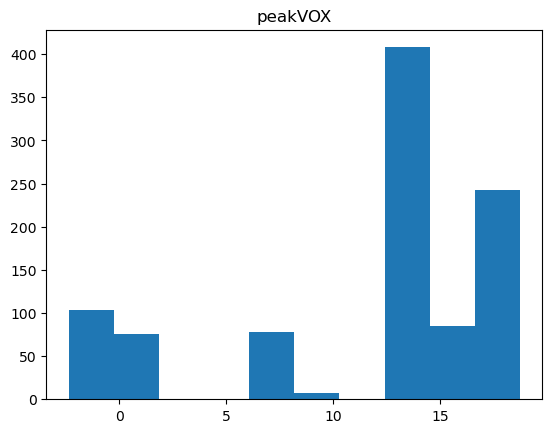

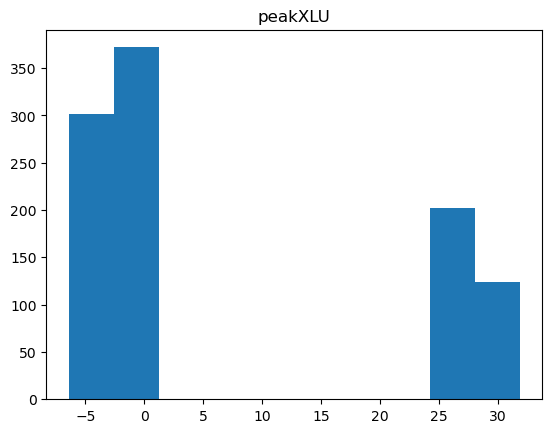

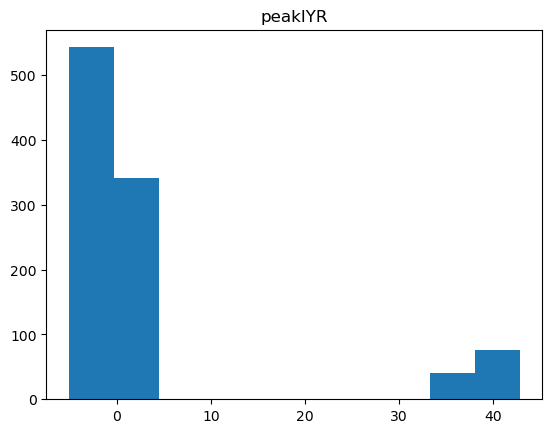

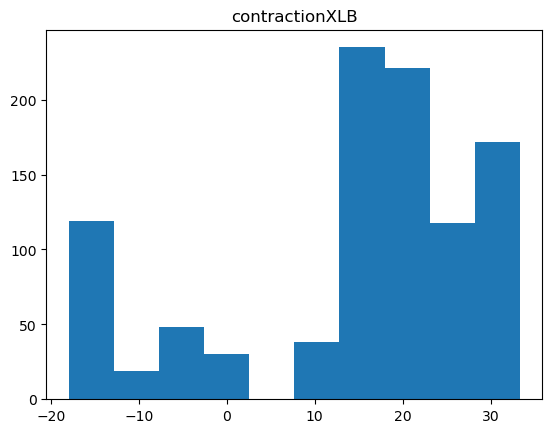

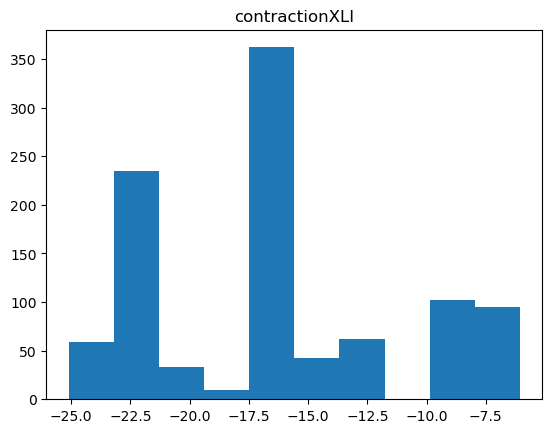

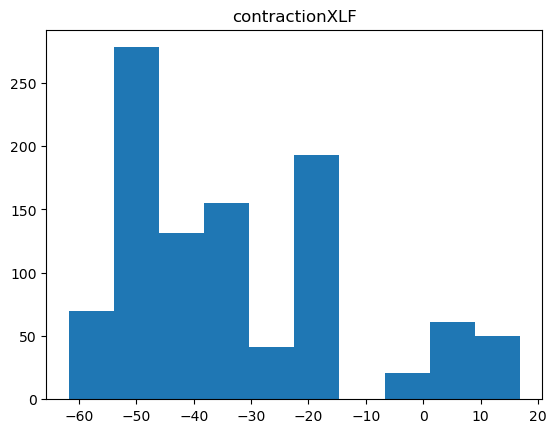

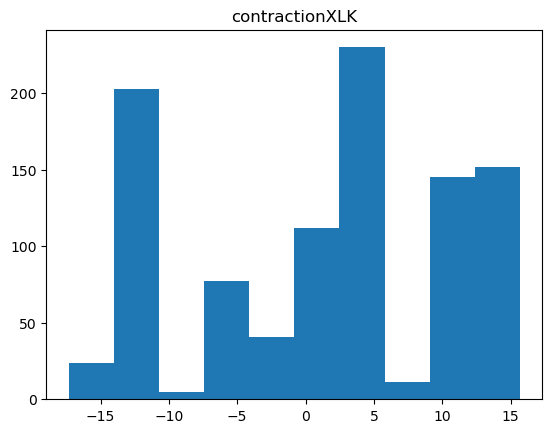

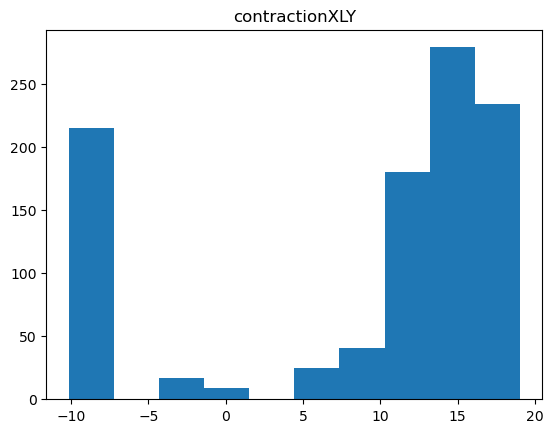

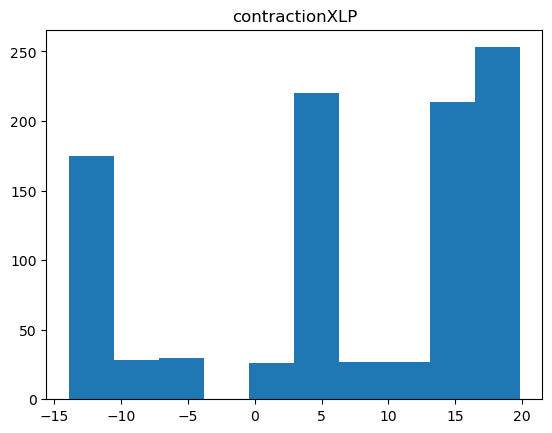

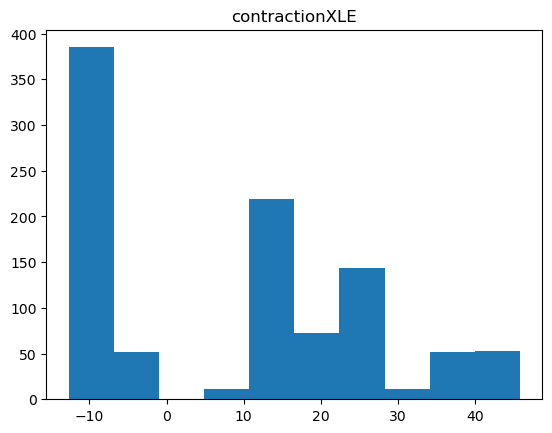

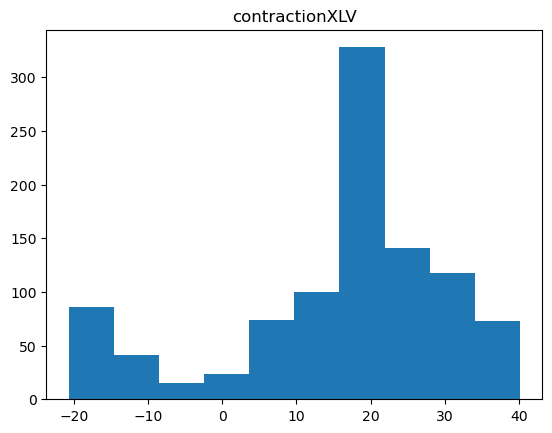

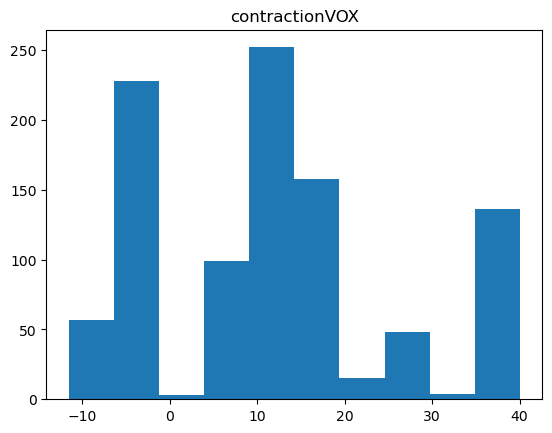

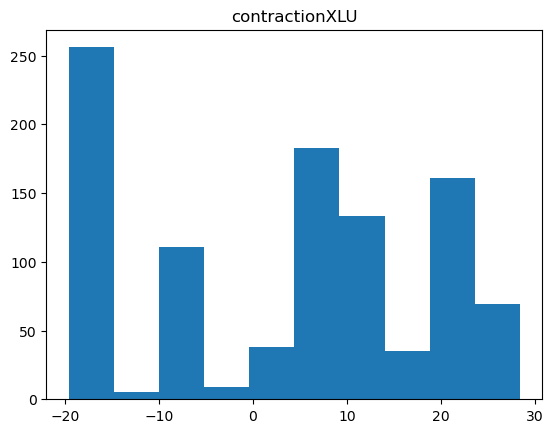

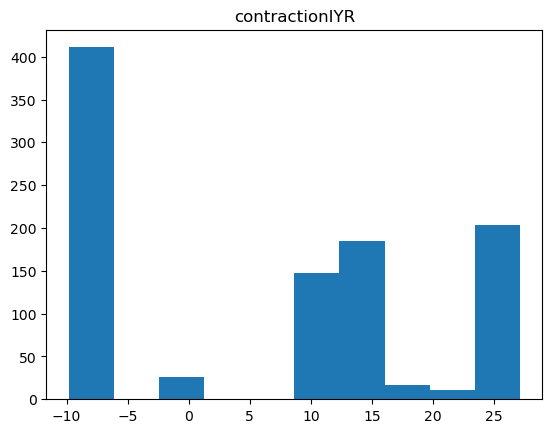

In [32]:
for period in economic_cycle_periods_list:
    for ticker in sector_etf_tickers:
        plt.hist(roi_tracking[period][ticker])
        plt.title(f'{period}{ticker}')
        plt.show()